# Applications of Bilateral Filter

In [1]:
# Importing relevant packages and doing necessary setup
import cv2
import matplotlib.pyplot as plt
import matplotlib
import PIL
import numpy as np

%matplotlib inline

# for auto-reloading external modules
%load_ext autoreload
%autoreload 2

In [2]:
# Helper function to display multiple images in a plot
def display_images(images, rows, cols, size, title, subtitles):
    fig = plt.figure(figsize = size)
    c = 0
    sz = len(images)
    for i in range(rows):
        for j in range(cols):
            if sz == c:
                break
            ax1 = fig.add_subplot(rows, cols, c + 1)
            ax1.imshow(images[c], cmap = 'gray')
            ax1.set_title(subtitles[c], fontsize = 20)
            c = c + 1
    plt.show()
    # Un comment the below line and comment the above line to save and display
    #plt.savefig('part2.png')

### Part 1

In [3]:
def bilateral_filter(img, img_flash, sigma_d, sigma_r, sz):
    gaussian_kernel = np.zeros((sz, sz))
    res = np.zeros(img.shape)
    img = img.astype(np.float64)
    rows = img.shape[0]
    cols = img.shape[1]
    for i in range(sz):
        for j in range(sz):
                gaussian_kernel[i][j] = np.exp(-(((i - int(sz / 2)) * (i - int(sz / 2))) + ((j - int(sz / 2)) * (j - int(sz / 2))) ) / (2 * sigma_d * sigma_d))
    for i in range(int(sz / 2), rows - int(sz / 2)):
        for j in range(int(sz / 2), cols - int(sz / 2)):
            for k in range(3):
                l_r = i - int(sz / 2)
                r_r = i + int(sz / 2)
                l_c = j - int(sz / 2)
                r_c = j + int(sz / 2)
                subpart = img[l_r : r_r + 1, l_c : r_c + 1, k : k + 1].reshape(sz, -1)
                second_component = img_flash[l_r : r_r + 1, l_c : r_c + 1, k : k + 1].reshape(sz, -1) - img[i][j][k]
                range_component = second_component * second_component
                range_component = range_component / (2 * sigma_r * sigma_r)
                range_component = np.exp(-range_component)
                kernel = gaussian_kernel * range_component
                s = sum(sum(kernel))
                res[i][j][k] = (sum(sum(subpart * kernel))) / s
    return res.astype('uint8')

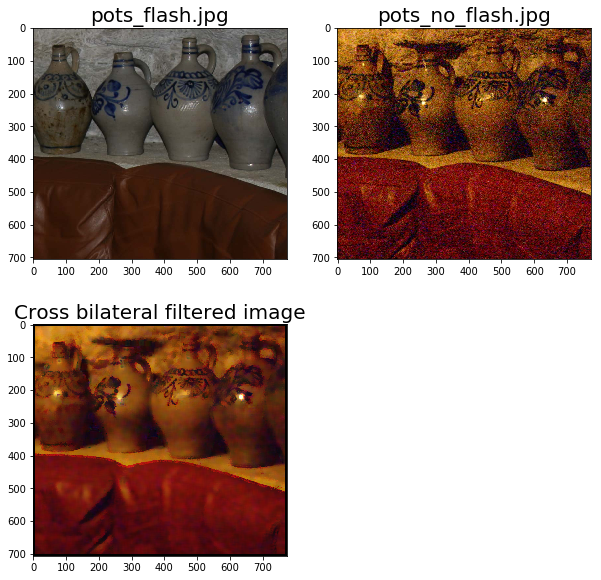

In [4]:
images = []
img = cv2.cvtColor(cv2.imread('../input_data/pots_no_flash.jpg'), cv2.COLOR_BGR2RGB)
img_flash = cv2.cvtColor(cv2.imread('../input_data/pots_flash.jpg'), cv2.COLOR_BGR2RGB)
output = bilateral_filter(img, img_flash, 1200, 20, 15)
images.append(img_flash)
images.append(img)
images.append(np.uint8(output))
subtitles = []
subtitles.append('pots_flash.jpg')
subtitles.append('pots_no_flash.jpg')
subtitles.append('Cross bilateral filtered image')
display_images(images, 2, 2, (10, 10), 'title', subtitles)

Kernel size : 15 x 15<br>
sigma_d = 1200<br>
sigma_r = 20

### Part 2

In [5]:
def inverse_bilateral_filter_inefficient(img, sigma_d, sigma_r, sz):
    img = img.astype(np.float64)
    row = img.shape[0]
    col = img.shape[1]
    res = np.zeros(img.shape)
    for i in range(int(sz / 2), row - int(sz / 2)):
        for j in range(int(sz / 2), col - int(sz / 2)):
            for c in range(3):
                s = 0
                for k in range(i - int(sz / 2), i + int(sz / 2) + 1):
                    for l in range(j - int(sz / 2), j + int(sz / 2) + 1):
                        ttt = np.exp(-((i - k) * (i - k) + (j - l) * (j - l)) / (2 * sigma_d * sigma_d)) * (np.exp(-(255 * 255 - ((img[i][j][c] - img[k][l][c]) * (img[i][j][c] - img[k][l][c]))) / (2 * sigma_r * sigma_r)))
                        s = s + ttt
                        res[i][j][c] = res[i][j][c] + img[k][l][c] * ttt
                res[i][j][c] = res[i][j][c] / s
    return res

In [6]:
def inverse_bilateral_filter(img, sigma_d, sigma_r, sz):
    gaussian_kernel = np.zeros((sz, sz))
    res = np.zeros(img.shape)
    img = img.astype(np.float64)
    rows = img.shape[0]
    cols = img.shape[1]
    for i in range(sz):
        for j in range(sz):
                gaussian_kernel[i][j] = np.exp(-(((i - int(sz / 2)) * (i - int(sz / 2))) + ((j - int(sz / 2)) * (j - int(sz / 2))) ) / (2 * sigma_d * sigma_d))
    for i in range(int(sz / 2), rows - int(sz / 2)):
        for j in range(int(sz / 2), cols - int(sz / 2)):
            for k in range(3):
                l_r = i - int(sz / 2)
                r_r = i + int(sz / 2)
                l_c = j - int(sz / 2)
                r_c = j + int(sz / 2)
                subpart = img[l_r : r_r + 1, l_c : r_c + 1, k : k + 1].reshape(sz, -1)
                second_component = img[l_r : r_r + 1, l_c : r_c + 1, k : k + 1].reshape(sz, -1) - img[i][j][k]
                range_component = second_component * second_component
                range_component = (255 * 255 - range_component) / (2 * sigma_r * sigma_r)
                range_component = np.exp(-range_component)
                kernel = gaussian_kernel * range_component
                s = sum(sum(kernel))
                res[i][j][k] = (sum(sum(subpart * kernel))) / s
    return res.astype('uint8')

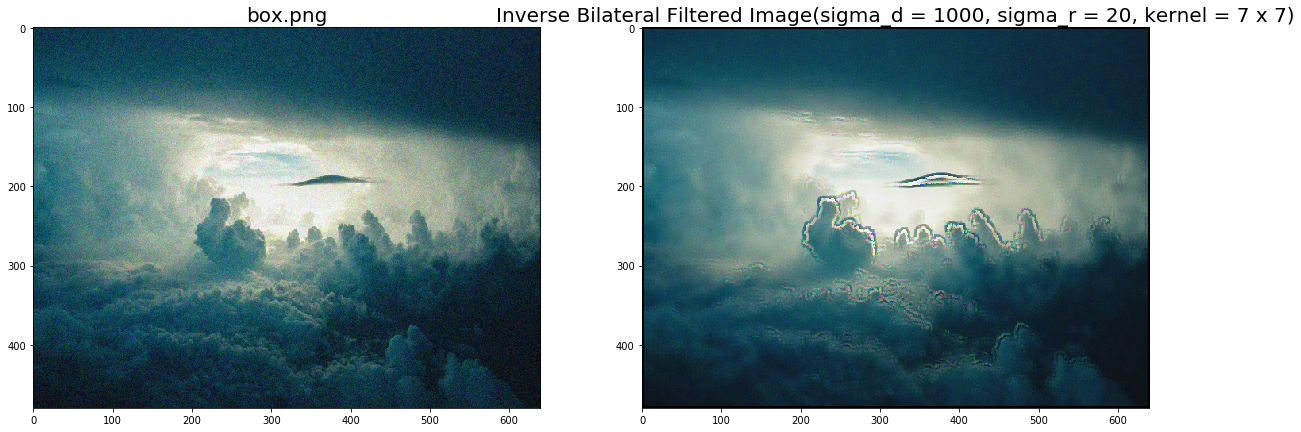

In [7]:
images = []
subtitles = []
#img = cv2.imread('../input_data/sky.png', cv2.IMREAD_GRAYSCALE)
img = cv2.cvtColor(cv2.imread('../input_data/sky.png'), cv2.COLOR_BGR2RGB)
output = inverse_bilateral_filter(img, 1000, 20, 7)
images.append(img)
images.append(np.uint8(output))
subtitles.append('box.png')
subtitles.append('Inverse Bilateral Filtered Image(sigma_d = 1000, sigma_r = 20, kernel = 7 x 7)')
display_images(images, 1, 2, (20, 20), 'title', subtitles)

Inverse Bilateral Filter can be used for saliency detection in an image. <br>
It can be used to generate saliency maps<br>
The analysis and automatic detection of visual salient image regions has been the subject of considerable research useful in object segmentation, adaptive compression and re-targeting. <br>

Reference: https://pdfs.semanticscholar.org/2924/8fc55214dba2c7e08430d6646e78e5d04517.pdf